In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [3]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

from sklearn.model_selection import train_test_split, KFold,cross_val_score

from sklearn.preprocessing import LabelEncoder


In [5]:
!pip install lightgbm

In [6]:
import lightgbm as lgb
import xgboost as xgb

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
credit_data = pd.read_csv('credit_card_clean.csv')
credit_data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,female,university,married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,female,university,single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,female,university,single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,female,university,married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,male,university,married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,male,highschool,married,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,male,highschool,single,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,male,university,single,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,male,highschool,married,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [9]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   SEX        30000 non-null  object 
 3   EDUCATION  30000 non-null  object 
 4   MARRIAGE   30000 non-null  object 
 5   AGE        30000 non-null  int64  
 6   PAY_1      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  BILL_AMT1  30000 non-null  float64
 13  BILL_AMT2  30000 non-null  float64
 14  BILL_AMT3  30000 non-null  float64
 15  BILL_AMT4  30000 non-null  float64
 16  BILL_AMT5  30000 non-null  float64
 17  BILL_AMT6  30000 non-null  float64
 18  PAY_AMT1   30000 non-null  float64
 19  PAY_AMT2   30000 non-null  float64
 20  PAY_AM

In [11]:
label = LabelEncoder()

object_list = ['SEX','EDUCATION','MARRIAGE' ]

for i in object_list:
    credit_data[i] = label.fit_transform(credit_data[i])
    

In [ ]:
credit_data.drop('ID',axis = 1, inplace=True)

In [12]:
X = credit_data.iloc[:,1:-1]
y = credit_data.iloc[:,-1]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, shuffle=True, random_state=12)

0    18691
1     5309
Name: DEFAULT, dtype: int64


<AxesSubplot:ylabel='DEFAULT'>

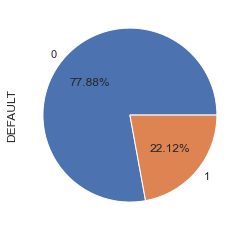

In [15]:
print(y_train.value_counts())

y_train.value_counts().plot.pie(autopct = '%0.2f%%')

0    4673
1    1327
Name: DEFAULT, dtype: int64


<AxesSubplot:ylabel='DEFAULT'>

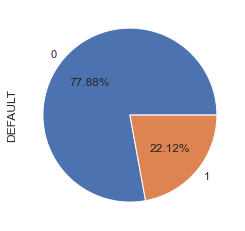

In [16]:
print(y_test.value_counts())

y_test.value_counts().plot.pie(autopct = '%0.2f%%')

### Model Building

In [14]:
rf_classifier  = RandomForestClassifier()
adb_classifier = AdaBoostClassifier()
gb_classifier  = GradientBoostingClassifier()
xgb_classifier = XGBClassifier()
lgb_classifier = LGBMClassifier()

In [17]:
%%time
rf_classifier.fit(X_train,y_train)

Wall time: 6.35 s


RandomForestClassifier()

In [18]:
%%time
adb_classifier.fit(X_train,y_train)

Wall time: 2.17 s


AdaBoostClassifier()

In [19]:
%%time
gb_classifier.fit(X_train,y_train)

Wall time: 8.49 s


GradientBoostingClassifier()

In [20]:
%%time
xgb_classifier.fit(X_train,y_train)

[20:55:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 1.36 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [21]:
%%time
lgb_classifier.fit(X_train,y_train)

Wall time: 187 ms


LGBMClassifier()

###  Model Testing

In [22]:
y_pred_rf  = rf_classifier.predict(X_test)
y_pred_ab  = adb_classifier.predict(X_test)
y_pred_gb  = gb_classifier.predict(X_test)
y_pred_xgb = xgb_classifier.predict(X_test)
y_pred_lgb = lgb_classifier.predict(X_test)

###  Model Evaluation

#### Random Forest Performance

In [23]:
print('Accuracy Score  : ', round(accuracy_score(y_test,y_pred_rf),4))
print('Precision Score : ', round(precision_score(y_test,y_pred_rf),4))
print('Recall Score    : ', round(recall_score(y_test,y_pred_rf),4))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred_rf))

Accuracy Score  :  0.8185
Precision Score :  0.6587
Recall Score    :  0.3723
Confusion Matrix:
 [[4417  256]
 [ 833  494]]


#### AdaBoost Performace

In [24]:
print('Accuracy Score  : ', round(accuracy_score(y_test,y_pred_ab),4))
print('Precision Score : ', round(precision_score(y_test,y_pred_ab),4))
print('Recall Score    : ', round(recall_score(y_test,y_pred_ab),4))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred_ab))

Accuracy Score  :  0.8192
Precision Score :  0.6927
Recall Score    :  0.3278
Confusion Matrix:
 [[4480  193]
 [ 892  435]]


#### GB Performace

In [25]:
print('Accuracy Score  : ', round(accuracy_score(y_test,y_pred_gb),4))
print('Precision Score : ', round(precision_score(y_test,y_pred_gb),4))
print('Recall Score    : ', round(recall_score(y_test,y_pred_gb),4))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred_gb))

Accuracy Score  :  0.8248
Precision Score :  0.696
Recall Score    :  0.3693
Confusion Matrix:
 [[4459  214]
 [ 837  490]]


#### XGBM Performance

In [26]:
print('Accuracy Score  : ', round(accuracy_score(y_test,y_pred_xgb),4))
print('Precision Score : ', round(precision_score(y_test,y_pred_xgb),4))
print('Recall Score    : ', round(recall_score(y_test,y_pred_xgb),4))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred_xgb))

Accuracy Score  :  0.8153
Precision Score :  0.645
Recall Score    :  0.367
Confusion Matrix:
 [[4405  268]
 [ 840  487]]


#### LGBM Performance

In [27]:
print('Accuracy Score  : ', round(accuracy_score(y_test,y_pred_lgb),4))
print('Precision Score : ', round(precision_score(y_test,y_pred_lgb),4))
print('Recall Score    : ', round(recall_score(y_test,y_pred_lgb),4))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred_lgb))

Accuracy Score  :  0.822
Precision Score :  0.6863
Recall Score    :  0.3595
Confusion Matrix:
 [[4455  218]
 [ 850  477]]


# FEATURE IMPORTANCES

In [44]:
RF_imp_Features  = rf_classifier.feature_importances_
Ada_imp_Features = adb_classifier.feature_importances_
GB_imp_Features  = gb_classifier.feature_importances_
XGB_imp_Features = xgb_classifier.feature_importances_
LGB_imp_Features = lgb_classifier.feature_importances_

In [46]:
models = [RF_imp_Features, , , , ]

col = [,]

In [48]:
Data = {'Features'        : X.columns,
        'Random_Forest'   : RF_imp_Features,
        'AdaBoost'        : Ada_imp_Features,
        'GradientBoost'   : GB_imp_Features,
        'XtremeGB'        : XGB_imp_Features,
        'LightGB'         : LGB_imp_Features
       }

In [49]:
feature_imp_df = pd.DataFrame(data = Data )
feature_imp_df

,Features,Random_Forest,AdaBoost,GradientBoost,XtremeGB,LightGB
0,LIMIT_BAL,0.060405,0.08,0.032723,0.024132,215
1,SEX,0.012732,0.02,0.002271,0.017697,35
2,EDUCATION,0.018142,0.00,0.002574,0.020403,64
3,MARRIAGE,0.013074,0.02,0.004880,0.020488,36
4,AGE,0.065899,0.00,0.006142,0.017460,201
5,PAY_1,0.092602,0.18,0.629938,0.356028,103
6,PAY_2,0.043572,0.06,0.083481,0.117766,44
7,PAY_3,0.028391,0.02,0.032262,0.049169,50
8,PAY_4,0.026325,0.02,0.017907,0.041508,37
9,PAY_5,0.021053,0.04,0.016106,0.042685,37


In [50]:
rf_imp_features = feature_imp_df.sort_values(by = 'Random_Forest', ascending= False, axis = 0)

rf_imp_features

,Features,Random_Forest,AdaBoost,GradientBoost,XtremeGB,LightGB
5,PAY_1,0.092602,0.18,0.629938,0.356028,103
4,AGE,0.065899,0.00,0.006142,0.017460,201
11,BILL_AMT1,0.060594,0.12,0.035177,0.024950,264
0,LIMIT_BAL,0.060405,0.08,0.032723,0.024132,215
12,BILL_AMT2,0.055599,0.02,0.009238,0.020618,132
17,PAY_AMT1,0.052510,0.02,0.016107,0.020551,191
13,BILL_AMT3,0.051818,0.06,0.008708,0.021075,147
14,BILL_AMT4,0.050878,0.06,0.006037,0.021458,154
15,BILL_AMT5,0.050868,0.04,0.006990,0.019262,132
16,BILL_AMT6,0.050321,0.00,0.006038,0.019284,171


<AxesSubplot:xlabel='Random_Forest', ylabel='Features'>

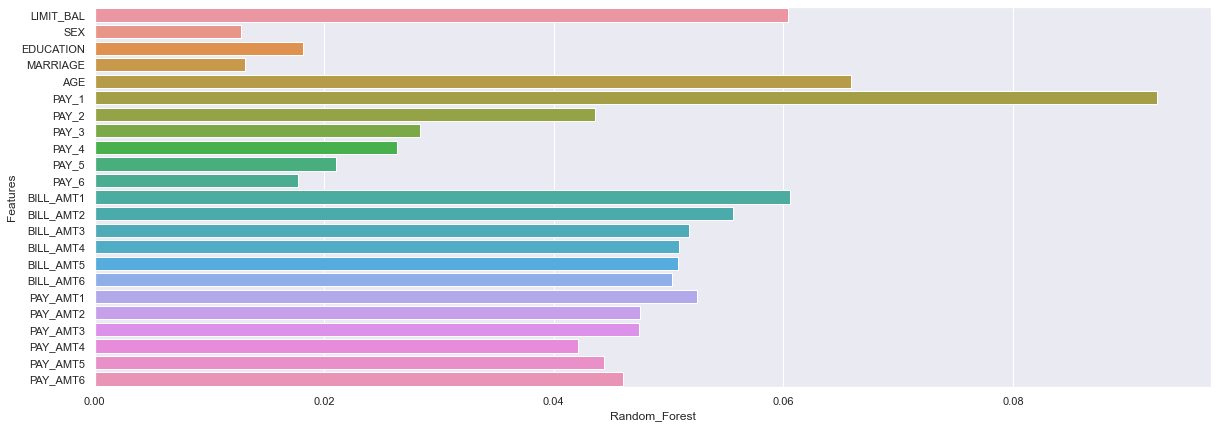

In [51]:
plt.figure(figsize=(20,7))
sns.barplot(feature_imp_df['Random_Forest'], feature_imp_df['Features'] )

In [56]:
feature_imp_df.columns

Index(['Features', 'Random_Forest', 'AdaBoost', 'GradientBoost', 'XtremeGB',
       'LightGB'],
      dtype='object')

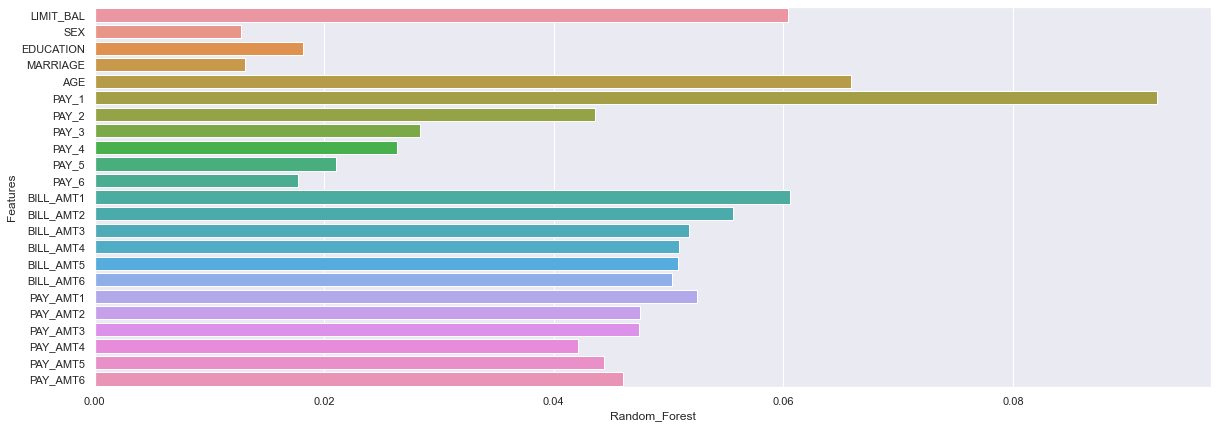

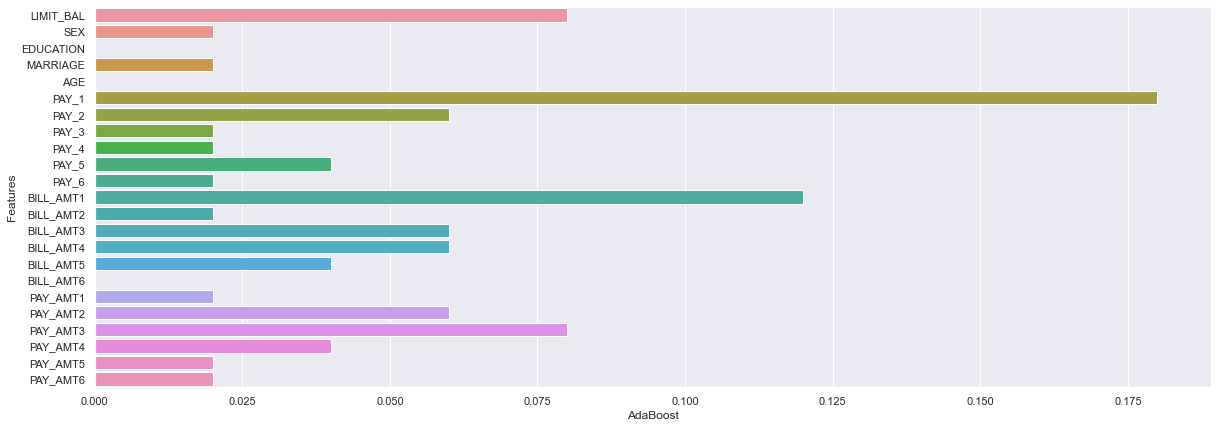

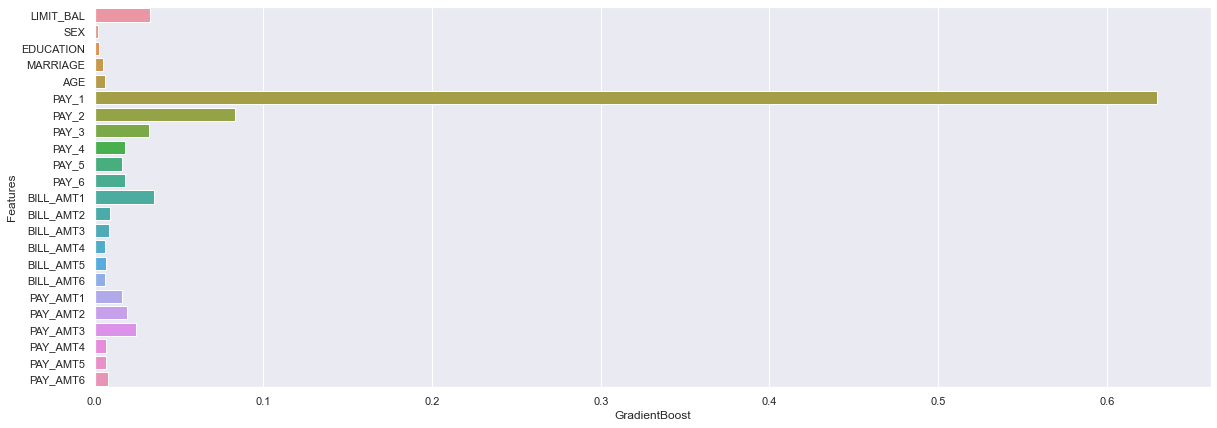

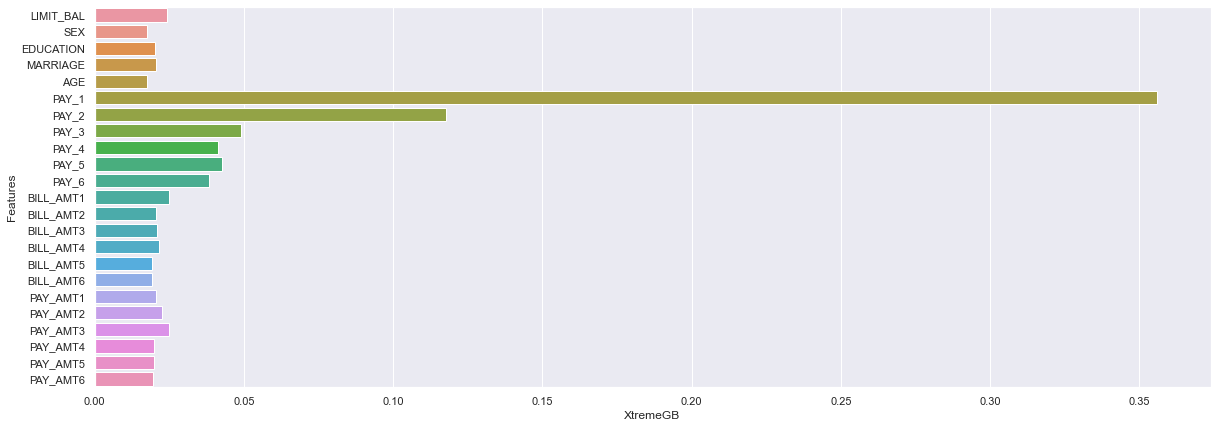

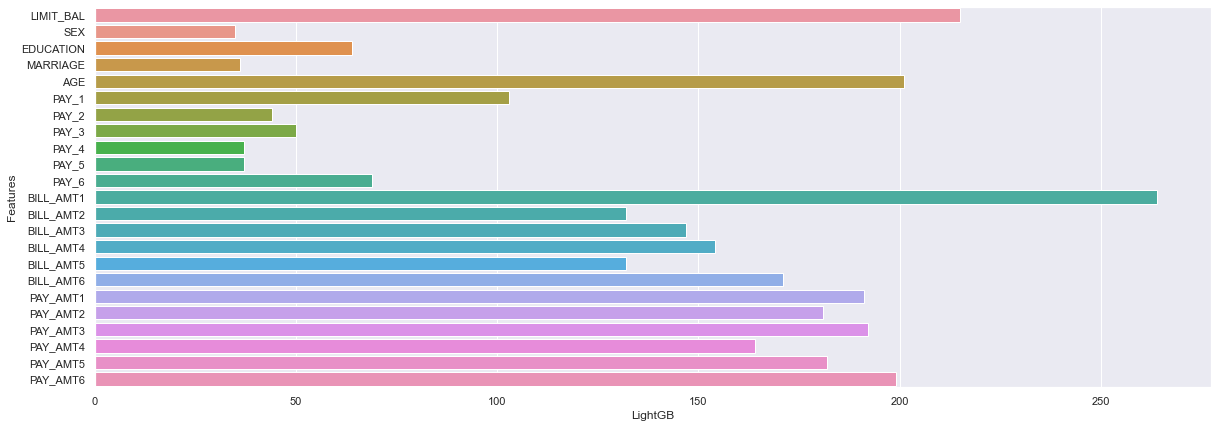

In [57]:
for i in feature_imp_df.columns[1:]:
    
    plt.figure(figsize=(20,7))
    sns.barplot(feature_imp_df[i], feature_imp_df['Features'] )